In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2,l1
from tensorflow.python import train
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers,Sequential
from google.colab import drive

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Data augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the real and fake galaxy images from the directories
train_dir = '/content/drive/MyDrive/Group_Project_Data/Train'
test_dir = '/content/drive/MyDrive/Group_Project_Data/Valid'


train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')
#train images are loaded
x_train=[]
y_train=[]

for i in range(len(train_generator)):
  batch_x,batch_y=next(train_generator)
  x_train.append(batch_x)
  y_train.append(batch_y)

x_train=np.concatenate(x_train,axis=0)
y_train=np.concatenate(y_train,axis=0)
#test images are loaded
x_test=[]
y_test=[]

for i in range(len(test_generator)):
  batch_x,batch_y=next(test_generator)
  x_test.append(batch_x)
  y_test.append(batch_y)
x_test=np.concatenate(x_test,axis=0)
y_test=np.concatenate(y_test,axis=0)



Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


(64, 64, 1)


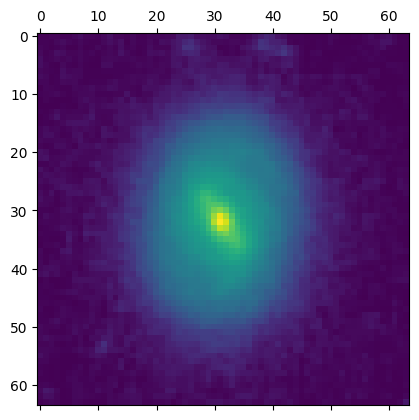

In [6]:
print(x_train[0].shape)
plt.matshow(x_train[0])

In [158]:
model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(64, 64, 1)))

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 4
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))

# Dense layer 2
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 6, 6, 128)      

In [159]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [160]:
Early_Stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# Train the model
history = model.fit(x_train, y_train,batch_size=128,epochs=30, callbacks=[Early_Stop],
                    validation_data=(x_test, y_test))

Epoch 1/30
47/47 [==============================] - 4s 25ms/step - loss: 1.7977 - accuracy: 0.5865 - val_loss: 0.8133 - val_accuracy: 0.6770
Epoch 2/30
47/47 [==============================] - 1s 18ms/step - loss: 0.4832 - accuracy: 0.8685 - val_loss: 0.2662 - val_accuracy: 0.9775
Epoch 3/30
47/47 [==============================] - 1s 17ms/step - loss: 0.1887 - accuracy: 0.9863 - val_loss: 0.1522 - val_accuracy: 0.9885
Epoch 4/30
47/47 [==============================] - 1s 17ms/step - loss: 0.1485 - accuracy: 0.9857 - val_loss: 0.2088 - val_accuracy: 0.9795
Epoch 5/30
47/47 [==============================] - 1s 18ms/step - loss: 0.1252 - accuracy: 0.9908 - val_loss: 0.1190 - val_accuracy: 0.9925
Epoch 6/30
47/47 [==============================] - 1s 17ms/step - loss: 0.0964 - accuracy: 0.9958 - val_loss: 0.0899 - val_accuracy: 0.9965
Epoch 7/30
47/47 [==============================] - 1s 18ms/step - loss: 0.0842 - accuracy: 0.9973 - val_loss: 0.0879 - val_accuracy: 0.9920
Epoch 8/30
47

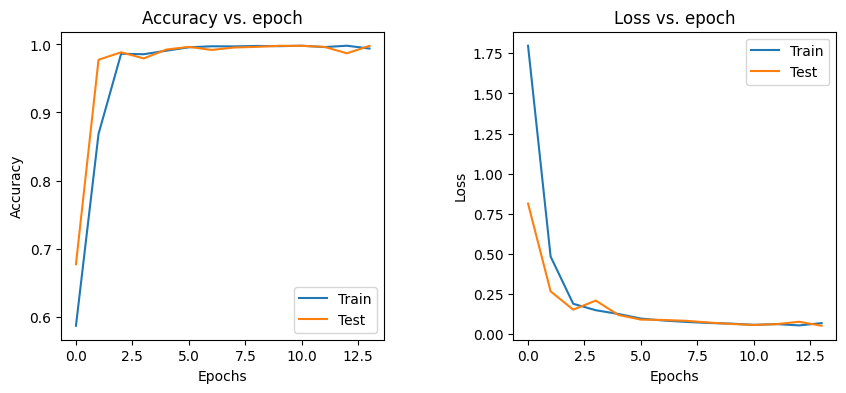

In [161]:
# Plotting the accuracy and loss plots
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Test')
axes[0].set_title("Accuracy vs. epoch")
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Test')
axes[1].set_title("Loss vs. epoch")
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.show()

63/63 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9980
Test loss: 0.05187404900789261
Test accuracy: 0.9980000257492065
63/63 [==============================] - 0s 3ms/step
Pred:  [0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0]
Test:  [0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
Test:  ['Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real']
Pred:  ['Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real']
Correctly labelled count:  1996
Incorrect labelled count:  4


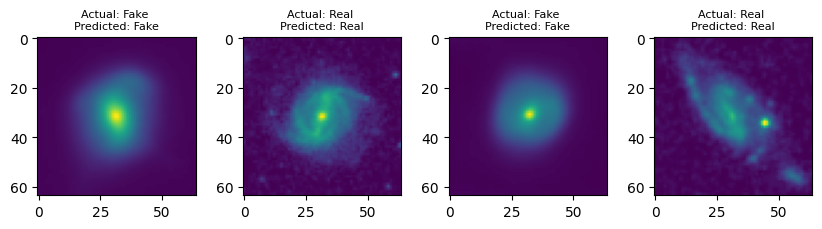

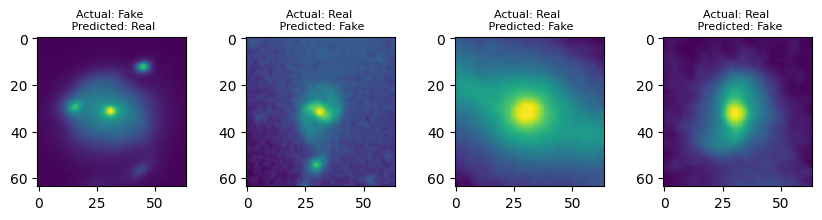

In [163]:
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation metrics
print('Test loss:', loss)
print('Test accuracy:', accuracy)


prediction = model.predict(x_test)
y_pred = tf.where(prediction <= 0.5,0,1)
y_pred_classes = np.array(y_pred).reshape(-1,)
print('Pred: ',y_pred_classes[:20])
print("Test: ",y_test[:20])
labels = {0:'Fake', 1:'Real'}
# Convert label indices to label names
y_test_labels = [labels[y] for y in y_test]
pred_labels = [labels[y] for y in y_pred_classes]

print('Test: ',y_test_labels[:10])  
print('Pred: ',pred_labels[:10])

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_test)[0]
incorrect_indices = np.where(y_pred_classes != y_test)[0]
print("Correctly labelled count: ",len(correct_indices))
print("Incorrect labelled count: ",len(incorrect_indices))

# Plot examples of correctly classified images
fig, ax = plt.subplots(1, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(4):
    ax[i].imshow(x_test[correct_indices[i]])
    ax[i].set_title(f"Actual: {y_test_labels[correct_indices[i]]} \nPredicted: {pred_labels[correct_indices[i]]}", fontsize = 8)
plt.show()

# Plot examples of incorrectly classified images
fig, ax = plt.subplots(1, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.4, hspace=0.3)
for i in range(4):
    ax[i].imshow(x_test[incorrect_indices[i]])
    ax[i].set_title(f"Actual: {y_test_labels[incorrect_indices[i]]} \n Predicted: {pred_labels[incorrect_indices[i]]}", fontsize = 8)
plt.show()

In [165]:
# Saving your model

model.save('/content/Group_Project_Model_Trained')

In [166]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Group_Project_Model_Trained')
loaded_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 6, 6, 128)      

In [167]:
# zip the model
!zip -r /content/drive/MyDrive/Group_Project_Data_42.zip /content/Group_Project_Model_Trained

  adding: content/Group_Project_Model_Trained/ (stored 0%)
  adding: content/Group_Project_Model_Trained/assets/ (stored 0%)
  adding: content/Group_Project_Model_Trained/saved_model.pb (deflated 89%)
  adding: content/Group_Project_Model_Trained/variables/ (stored 0%)
  adding: content/Group_Project_Model_Trained/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/Group_Project_Model_Trained/variables/variables.index (deflated 66%)
  adding: content/Group_Project_Model_Trained/keras_metadata.pb (deflated 93%)
  adding: content/Group_Project_Model_Trained/fingerprint.pb (stored 0%)
